In [1]:
# import and initialize otter
import otter
grader = otter.Notebook("p9.ipynb")

In [2]:
import public_tests

In [3]:
# PLEASE FILL IN THE DETAILS
# enter none if you don't have a project partner
# you will have to add your partner as a group member on Gradescope even after you fill this

# project: p9
# submitter: zchen2365
# partner: None

# Project 9: Analyzing the Movies

## Learning Objectives:

In this project, you will demonstrate your ability to:
- use `matplotlib` to plot bar graphs and visualize statistics
- process data using dictionaries and lists that you build
- implement binning by writing algorithms that create dictionaries
- custom sort a list using the keyword parameter `key`'s argument.

Please go through [Lab-P9](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p9) before starting this project. The lab introduces some useful techniques necessary for this project.

## Testing your code:

Along with this notebook, you must have downloaded the file `public_tests.py`. If you are curious about how we test your code, you can explore this file, and specifically the value of the variable `expected_json`, to understand the expected answers to the questions.

**Important:** `public_tests.py` **cannot** verify your answers when the output is an image. Your **plots** will be **checked** by the Gradescope autograder, so you must **manually** confirm that your plots look correct by comparing with the images provided in the notebook.

<h2 style="color:red">Warning (Note on Academic Misconduct):</h2>

**IMPORTANT**: **P8 and P9 are two parts of the same data analysis.** You **cannot** switch project partners between these two projects. That is if you partnered up with someone for P8, you have to sustain that partnership until the end of P9. Now may be a good time to review [our course policies](https://cs220.cs.wisc.edu/s24/syllabus.html).

Under any circumstances, **no more than two students are allowed to work together on a project** as mentioned in the course policies. If your code is flagged by our code similarity detection tools, **both partners will be responsible** for sharing/copying the code, even if the code is shared/copied by one of the partners with/from other non-partner student(s). Note that each case of plagiarism will be reported to the Dean of Students with a zero grade on the project. **If you think that someone cannot be your project partner then don’t make that student your lab partner.**

**<font color = "red">Project partners must submit only one copy of their project on Gradescope, but they must include the names of both partners.</font>**

## Introduction:

In P8, you created very useful helper functions to parse the raw IMDb dataset. You also created useful data structures to store the data. In this project, you will be building on the work you did in P8 to analyze your favorite movies. This is a shorter project than usual, and **P9 will only have 10 questions for you to solve**.

## Data:

In P9, you will be analyzing the same dataset that you worked with in P8. You may download the files fresh, or just copy/paste the datasets from your P8 directory.

## Project Requirements:

You **may not** hardcode indices in your code, unless the question explicitly asks you to do so. If you open your `.csv` files with Excel, manually count through the rows and use this number to loop through the dataset, this is also considered as hardcoding. If any instances of hardcoding are found during code review, the Gradescope autograder will **deduct** points from your public score.

**Store** your final answer for each question in the **variable specified for each question**. This step is important because Otter grades your work by comparing the value of this variable against the correct answer.

For some of the questions, we'll ask you to write (then use) a function to compute the answer. If you compute the answer **without** creating the function we ask you to write, the Gradescope autograder will **deduct** points from your public score, even if the way you did it produced the correct answer.

#### Required Functions:
- `get_mapping`
- `get_raw_movies`
- `get_movies`
- `find_specific_movies`
- `bucketize`

In this project, you will also be required to define certain **data structures**. If you do not create these data structures exactly as specified, the Gradescope autograder will **deduct** points from your public score, even if the way you did it produced the correct answer.

#### Required Data Structures:
- `movies`
- `cast_buckets`
- `director_buckets`
- `genre_buckets`
- `year_buckets`

You are only allowed to define these data structures **once** and we'll **deduct** points from your public score on Gradescope if you redefine the values of these variables.

In this project (and the next), you will be asked to create **lists** of movies. For all such questions, **unless it is explicitly mentioned otherwise**, the movies should be in the **same order** as in the `movies.csv` (or `small_movies.csv`) file. Similarly, for each movie, the **list** of `genres`, `directors`, and `cast` members should always be in the **same order** as in the `movies.csv` (or `small_movies.csv`) file.

Students are only allowed to use Python commands and concepts that have been taught in the course prior to the release of P9. Therefore, you should not use the `pandas` module. The Gradescope autograder will **deduct** points from your public score otherwise.

For more details on what will cause you to lose points during code review and specific requirements, please take a look at the [Grading rubric](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/blob/main/p9/rubric.md).

## Project Questions and Functions:

In [4]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project

import csv
import pandas
import matplotlib

## Loading the Movies Data

For all these questions, we will be looking at the movies in `mapping.csv` and `movies.csv`. You can load the list of movies using the functions you wrote in the last project.

Copy the functions you wrote in `p8.ipynb` to `p9.ipynb` to read the movies data. The functions you should include are `process_csv`, `get_mapping`, `get_raw_movies`, and `get_movies` along with any helper functions you used to write these. Do **not** copy/paste `find_specific_movies` here. Later in P9, we will provide you with a simpler version of that function, which does not require the use of the `copy` module.

In [5]:
# copy/paste the definition of process_csv from previous projects (p6 or p7)
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

# copy/paste the definition of get_mapping from p8.ipynb
def get_mapping(path):
    """
    get_mapping(path) converts a mapping csv in 'path' 
    into a dict with keys as IDs and values as names
    """
# Process path
    mapping_file = open(path, encoding="utf-8")
    mapping_reader = csv.reader(mapping_file)
    mapping_data = list(mapping_reader)

# Create a dictionary
    mapping_dict = {}

# Iterate through each row of processed path
    for row in mapping_data:
# Map value in first column (ID) to value in second column (name/title)
        mapping_dict[row[0]] = row[1]

    mapping_file.close()  # Close the file after processing

    return mapping_dict

In [6]:
grader.check("get_mapping")

get_mapping results: All test cases passed!

In [7]:
# copy/paste the definition of get_raw_movies from p8.ipynb
# as well as any other helper functions used by this function here
def get_raw_movies(path):
    """
    get_raw_movies(path) converts a movies csv in 'path' 
    into a list of dicts with column names as keys and
    the corresponding type converted values as the values
    """
# Process the CSV file
    movies_file = open(path, encoding="utf-8")
    movies_reader = csv.reader(movies_file)
    movies_data = list(movies_reader)

# Extract the header and rows
    header = movies_data[0]
    rows = movies_data[1:]

# Create a list to store the movie dictionaries
    movies_list = []

# Iterate over each row in the movies data
    for row in rows:
        movie_dict = {}
    
    # Iterate over each column in the header
        for i in range(len(header)):
            column_name = header[i]
            value = row[i]
            
        
        # Convert the values to the appropriate data types
            if column_name == 'title':
                movie_dict[column_name] = value
            elif column_name == 'year' or column_name == 'duration':
                movie_dict[column_name] = int(value)
            elif column_name == 'genres':
                movie_dict[column_name] = value.split(', ')
            elif column_name == 'rating':
                movie_dict[column_name] = float(value)
            elif column_name == 'directors' or column_name == 'cast':
                movie_dict[column_name] = value.split(', ')
    
    # Append the movie dictionary to the movies list
        movies_list.append(movie_dict)

    movies_file.close()  # Close the file after processing

    return movies_list

In [8]:
grader.check("get_raw_movies")

get_raw_movies results: All test cases passed!

In [9]:
# copy/paste the definition of get_movies from p8.ipynb
# as well as any other helper functions used by this function here
def get_movies(movies_path, mapping_path):
    """
    get_movies(movies_path, mapping_path) converts a movies csv in 'movies_path' 
    into a list of dicts with column names as keys and the corresponding 
    type converted values as the values; then uses the mapping csv in 'mapping_path'
    to replace the IDs of the titles, cast, and directors into actual names
    """
    # Call get_mapping to get the mapping dictionary
    mapping_dict = get_mapping(mapping_path)
    # Call get_raw_movies to get the list of movie dictionaries
    raw_movies_list = get_raw_movies(movies_path)

# Create a list to store the modified movie dictionaries
    movies_list = []

# Iterate over each movie dictionary in raw_movies_list
    for movie in raw_movies_list:
        new_movie = {}
    
    # Map the title ID to the actual title name
        title_id = movie['title']
        new_movie['title'] = mapping_dict[title_id]
    
    # Add the other columns to the new dictionary
        new_movie['year'] = movie['year']
        new_movie['duration'] = movie['duration']
        new_movie['genres'] = movie['genres']
        new_movie['rating'] = movie['rating']
    
    # Map the director IDs to the actual director names
        director_names = []
        for director_id in movie['directors']:
            director_names.append(mapping_dict[director_id])
            new_movie['directors'] = director_names
    
    # Map the cast IDs to the actual actor names
        cast_names = []
        for cast_id in movie['cast']:
            cast_names.append(mapping_dict[cast_id])
            new_movie['cast'] = cast_names
    
    # Append the modified movie dictionary to the movies list
        movies_list.append(new_movie)

    return movies_list

In [10]:
grader.check("get_movies")

get_movies results: All test cases passed!

Now, you can use `get_movies` to read the data in `movies.csv` and `mapping.csv` as you did in P8.

In [11]:
# create a list of dictionaries named 'movies' to store the data in 'movies.csv' and 'mapping.csv' as in p8
# do NOT display the value of this variable anywhere in this notebook

movies = get_movies("movies.csv", "mapping.csv")

In [12]:
grader.check("movies")

movies results: All test cases passed!

There should be *75123* **dictionaries** in the **list** `movies` and the first entry of `movies` should be a **dictionary** that looks as follows:

```python
{'title': 'Countdown',
 'year': 1996,
 'duration': 90,
 'genres': ['Crime', 'Mystery', 'Thriller'],
 'rating': 3.9,
 'directors': ['Keoni Waxman'],
 'cast': ['Yûki Amami', 'Lori Petty', 'Jason London', 'James Le Gros']}
```

**Warning:** At this stage, it is expected that the function `get_movies` works correctly, and that `movies` is defined as it was in P8. If not, your code will run into issues in P9. So, make sure that this function works properly before you start P9. You can do that by **inserting a new cell** in Jupyter below this cell and verifying that the size of your variable `movies`, and that the first **dictionary** in `movies` is as it should be.

Also, just like in P8, delete any cells displaying the whole of `movies` data structure before turning in `p9.ipynb`.

Now, copy over the functions `plot_dict`, `median` and `year_to_decade` from Lab-P9.

In [13]:
# copy/paste the definition of plot_dict from Lab-P9
# as well as any helper functions used by that functions here
def plot_dict(d, label="Please Label Me!"):
    """plot_dict(d, label) creates a bar plot using the 
    dictionary 'd' and labels the y-axis as 'label'"""
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16, figsize=(4 + len(d)//4, 4))
    ax.set_ylabel(label, fontsize=16)

In [14]:
grader.check("plot_dict")

plot_dict results: All test cases passed!

In [15]:
# copy/paste the definition of median from Lab-P9
# as well as any helper functions used by that functions here

def median(items):
    """
    median(items) returns the median of the list `items`
    """
   
    # sort the list
    sorted_list = sorted(items)
    # determine the length of the list
    list_len = len(items)
    if list_len % 2 == 1: # determine whether length of the list is odd
        # return item in the middle using indexing
        return sorted_list[list_len // 2]
    else:
        first_middle = sorted_list[list_len // 2 - 1] # use appropriate indexing
        second_middle = sorted_list[list_len // 2] # use appropriate indexing
        return (first_middle + second_middle) / 2

In [16]:
grader.check("median")

median results: All test cases passed!

In [17]:
# copy/paste the definition of year_to_decade from Lab-P9
# as well as any helper functions used by that functions here

def year_to_decade(year):
    if year % 10 == 0:
        decade = str(year - 9) + ' to ' + str(year)
    else:
        decade_start = year // 10 * 10 + 1
        decade = str(decade_start) + ' to ' + str(decade_start + 9)
    return decade

In [18]:
grader.check("year_to_decade")

year_to_decade results: All test cases passed!

In P8, you were provided with a function `find_specific_movies` which functioned as some sort of a 'search bar' for the movies dataset. However, in order to use that function properly, you had to use the `copy` module to pass a *copy* of your list of movies to `find_specific_movies`. Making copies frequently is **not** a good coding practice. For this project, we will provide **a new version** of `find_specific_movies` that does **not** require using `copy`. Please go through the following function:

In [19]:
# modified find_specific_movies (doesn't require using copy module)
def find_specific_movies(movies, keyword):
    """
    find_specific_movies(movies, keyword) takes a list of movie dictionaries 
    and a keyword; it returns a list of movies that contain the keyword
    in either its title, genre, cast or directors.
    """
    movies_with_keyword = []
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['cast']):
            movies_with_keyword.append(movie)
    return movies_with_keyword

In [20]:
grader.check("find_specific_movies")

find_specific_movies results: All test cases passed!

**Important:** **Even when you are not explicitly prompted to do so, using the `find_specific_movies` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of `find_specific_movies`.**

### Analyzing the Movies data

**Question 1:** What is the **median** `rating` of the movies that **involve** both *Clint Eastwood* and *Sergio Leone*?

You **must** make multiple calls to the `find_specific_movies` function to identify the movies which involve both *Clint Eastwood* and *Sergio Leone*.

In [21]:
# compute and store the answer in the variable 'median_eastwood_leone_rating', then display it

# Find movies involving Clint Eastwood
eastwood_movies = find_specific_movies(movies, 'Clint Eastwood')

# Find movies involving Sergio Leone from the Clint Eastwood movies
eastwood_leone_movies = find_specific_movies(eastwood_movies, 'Sergio Leone')

# Extract the ratings of the Eastwood-Leone movies
eastwood_leone_ratings = [movie['rating'] for movie in eastwood_leone_movies]

# Calculate the median rating
median_eastwood_leone_rating = median(eastwood_leone_ratings)

median_eastwood_leone_rating

8.2

In [22]:
grader.check("q1")

q1 results: All test cases passed!
q1 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`find_specific_movies` function is not used (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q1 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'median calculation is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q1 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'answer uses loops to iterate over dictionary keys (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 2:** Among all the *Toy Story* movies, which ones are the **highest** rated?

Your output **must** be a **list** of **dictionaries**. You **must** use `find_specific_movies` to identify all movies which have *Toy Story* as a substring of their `title`. You may assume there is no cast member or director named *Toy Story*, or any genre called *Toy Story*.

**Hint:** You could first find the **highest** `rating` that any *Toy Story* movie received, and then find all the *Toy Story* movies that received that `rating`.

In [23]:
# compute and store the answer in the variable 'highest_rated_toy_story_movies', then display it

# Find all Toy Story movies
toy_story_movies = find_specific_movies(movies, 'Toy Story')

# Find the highest rating among Toy Story movies
highest_rating = max(movie['rating'] for movie in toy_story_movies)

# Find Toy Story movies with the highest rating
highest_rated_toy_story_movies = [movie for movie in toy_story_movies if movie['rating'] == highest_rating]

highest_rated_toy_story_movies

[{'title': 'Toy Story 3',
  'year': 2010,
  'duration': 103,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 8.3,
  'directors': ['Lee Unkrich'],
  'cast': ['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Ned Beatty']},
 {'title': 'Toy Story',
  'year': 1995,
  'duration': 81,
  'genres': ['Adventure', 'Animation', 'Comedy'],
  'rating': 8.3,
  'directors': ['John Lasseter'],
  'cast': ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney']}]

In [24]:
grader.check("q2")

q2 results: All test cases passed!
q2 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`find_specific_movies` function is not used (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'rating of highest rated *Toy Story* movie is hardcoded (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'did not find all the movies with the highest rating (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q2 - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'answer uses loops to iterate over dictionary keys (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Function 1: `bucketize(movies_list, category)` 

This function should take in a **list** of movie **dictionaries** as well as a **category** (i.e. `title`, `year`, `duration`, `genres`, `rating`, `directors`, or `cast`), and *bucketize* the **list** of movie **dictionaries** by this **category**.

For example, the output of `bucketize(movies, 'rating')` should be a **dictionary** so that all the unique values of `rating` of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that rating (e.g., the value of the key *6.4* should be the **list** of movie dictionaries with `rating` of *6.4*).

The output of `bucketize(movies, 'rating')` should look like this:

```python
{3.9: [{'title': 'Countdown',
       'year': 1996,
       'duration': 90,
       'genres': ['Crime', 'Mystery', 'Thriller'],
       'rating': 3.9,
       'directors': ['Keoni Waxman'],
       'cast': ['Yûki Amami', 'Lori Petty', 'Jason London', 'James Le Gros']},
      {'title': 'A Darker Reality',
       'year': 2008,
       'duration': 88,
       'genres': ['Horror'],
       'rating': 3.9,
       'directors': ['Chris Kazmier'],
       'cast': ['Daniel Baldwin', 'James C. Burns', 'Sunny Doench', 'Alisha Seaton']},
       ...
      ],
 4.1: [{'title': 'Shadows & Lies',
      'year': 2010,
      'duration': 100,
      'genres': ['Crime', 'Drama'],
      'rating': 4.1,
      'directors': ['Jay Anania'],
      'cast': ['James Franco', 'Julianne Nicholson', 'Martin Donovan', 'Josh Lucas']},
     {'title': 'Paramedics',
      'year': 1988,
      'duration': 90,
      'genres': ['Comedy'],
      'rating': 4.1,
      'directors': ['Stuart Margolin'],
      'cast': ['George Newbern', 'Christopher McDonald', 'John P. Ryan', 'James Noble']},
       ...
      ],
 ...
}
```

Similarly, the output of `bucketize(movies, 'cast')` should be a **dictionary** so that all the unique `cast` members of the movies in `movies` are the **keys** and the correspoding **values** would be a **list** of all movie **dictionaries** with that cast member as one of their `cast` (e.g., the value of the key *Kate Winslet* should be the **list** of movie dictionaries with *Kate Winslet* as one of their `cast` members).

The output of `bucketize(movies, 'cast')` should look like this:

```python
{{'Peter Coyote': [{'title': 'Outrageous Fortune',
                      'year': 1987,
                      'duration': 99,
                      'genres': ['Comedy'],
                      'rating': 6.2,
                      'directors': ['Arthur Hiller'],
                      'cast': ['Shelley Long', 'Bette Midler', 'Peter Coyote', 'Robert Prosky']},
                     {'title': 'Sphere',
                      'year': 1998,
                      'duration': 134,
                      'genres': ['Action', 'Mystery', 'Sci-Fi'],
                      'rating': 6.1,
                      'directors': ['Barry Levinson'],
                      'cast': ['Dustin Hoffman', 'Sharon Stone', 'Samuel L. Jackson', 'Peter Coyote']},
                   ...
                  ],
 'Tchéky Karyo': [{'title': 'Vincent and Me',
                      'year': 1990,
                      'duration': 100,
                      'genres': ['Drama', 'Family', 'Fantasy'],
                      'rating': 6.2,
                      'directors': ['Michael Rubbo'],
                      'cast': ['Tchéky Karyo', 'Nina Petronzio', 'Christopher Forrest', 'Paul Klerk']},
                     {'title': 'Utopía',
                      'year': 2003,
                      'duration': 106,
                      'genres': ['Fantasy', 'Sci-Fi', 'Thriller'],
                      'rating': 5.2,
                      'directors': ['Maria Ripoll'],
                      'cast': ['Leonardo Sbaraglia', 'Najwa Nimri', 'Tchéky Karyo', 'José Garcia']},
                   ...
                  ]
 ...
} 
```

**Hints:** Note that depending on whether or not the `category` represents a **list** or not, your function will have to behave differently. In P8, you created a function `bucketize_by_genre` that *bucketized* the list of movies by their genre. Take a moment to find that function; it will help you here. Also, take a moment to look at the buckets you made in Lab-P9.

In [25]:
# replace the ... with your code to finish the definition of bucketize

def bucketize(movie_list, category):
    buckets = {}
    for movie in movie_list:
        category_value = ... #TODO: access the category value from a movie
        # TODO: bucketize depending on the type of `category_value`
    return buckets

In [26]:
def bucketize(movie_list, category):
    buckets = {}
    
    for movie in movie_list:
        category_value = movie[category]
        
        if isinstance(category_value, list):
            # If the category value is a list (e.g., 'genres', 'directors', 'cast')
            for item in category_value:
                if item not in buckets:
                    buckets[item] = []
                buckets[item].append(movie)
        else:
            # If the category value is a single value (e.g., 'title', 'year', 'duration', 'rating')
            if category_value not in buckets:
                buckets[category_value] = []
            buckets[category_value].append(movie)
    
    return buckets

In [27]:
grader.check("bucketize")

bucketize results: All test cases passed!
bucketize - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'input or output of the function is of wrong type (-0)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect when `category` data is stored in `movies` as a `str` or `int` (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function logic is incorrect when `category` data is stored in `movies` as a `list` (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'categories are hardcoded while checking if their data is stored as a `list` or not (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
bucketize - 5 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'function is defined more than once (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Important:** Just like `get_movies`, `bucketize` is quite a time-consuming function to run. Hence, you do **not** want to call `bucketize` on the same list of movies and category **more than once**. Throughout the project, we will frequently use bucketized lists of movies organized by their `cast`, `directors`, `genre`, and `year`. Rather than calling `bucketize` several times, we will store the bucketized lists in the following variables:

### Data Structure 1: `cast_buckets`

Use the `bucketize` function to bucketize by the `cast`

In [28]:
# define `cast_buckets`, but do NOT display the output here

# bucketize the full list of movies by their cast.
cast_buckets = bucketize(movies, 'cast')


In [29]:
grader.check("cast_buckets")

cast_buckets results: All test cases passed!
cast_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
cast_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Data Structure 2: `director_buckets`

Use the `bucketize` function to bucketize by the `directors`

In [30]:
# define `director_buckets`, but do NOT display the output here

# bucketize the full list of movies by their directors.
director_buckets = bucketize(movies, 'directors')


In [31]:
grader.check("director_buckets")

director_buckets results: All test cases passed!
director_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
director_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Data Structure 3: `genre_buckets`

Use the `bucketize` function to bucketize by the `genres`

In [32]:
# define `genre_buckets`, but do NOT display the output here

# bucketize the full list of movies by their genres.
genre_buckets = bucketize(movies, 'genres')


In [33]:
grader.check("genre_buckets")

genre_buckets results: All test cases passed!
genre_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
genre_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

### Data Structure 4: `year_buckets`

Use the `bucketize` function to bucketize by the `year`

In [34]:
# define `year_buckets`, but do NOT display the output here

# bucketize the full list of movies by their cast.
year_buckets = bucketize(movies, 'year')


In [35]:
grader.check("year_buckets")

year_buckets results: All test cases passed!
year_buckets - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`bucketize` function is not used (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
year_buckets - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'data structure is defined incorrectly (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

Even when you are not explicitly prompted to do so, using these data structures and the `bucketize` function cleverly can simplify your code significantly. Keep an eye out for how you can simplify your code by making use of these data structures and the `bucketize` function.

Remember, you can still use the `bucketize` function on a subset of the `movies` data structure (i.e. not the whole `movies` dataset). You are **not** limited to only using the variables defined above.

**Question 3:** List the movies that *Margot Robbie* was `cast` in.

Your output **must** be a **list** of **dictionaries**. You **must** answer this question by accessing the **value** of the correct **key** from the correct **bucket** defined in the previous cell.

In [36]:
# compute and store the answer in the variable 'robbie_movies', then display it
robbie_movies = cast_buckets['Margot Robbie']
robbie_movies

[{'title': 'The Suicide Squad',
  'year': 2021,
  'duration': 132,
  'genres': ['Action', 'Adventure', 'Comedy'],
  'rating': 7.2,
  'directors': ['James Gunn'],
  'cast': ['Margot Robbie', 'Idris Elba', 'John Cena', 'Joel Kinnaman']},
 {'title': 'Z for Zachariah',
  'year': 2015,
  'duration': 98,
  'genres': ['Drama', 'Romance', 'Sci-Fi'],
  'rating': 6.0,
  'directors': ['Craig Zobel'],
  'cast': ['Chiwetel Ejiofor', 'Chris Pine', 'Margot Robbie']},
 {'title': 'Bombshell',
  'year': 2019,
  'duration': 109,
  'genres': ['Biography', 'Drama'],
  'rating': 6.8,
  'directors': ['Jay Roach'],
  'cast': ['Charlize Theron',
   'Nicole Kidman',
   'Margot Robbie',
   'John Lithgow']},
 {'title': 'Suite Française',
  'year': 2014,
  'duration': 107,
  'genres': ['Drama', 'Romance', 'Thriller'],
  'rating': 7.0,
  'directors': ['Saul Dibb'],
  'cast': ['Michelle Williams',
   'Kristin Scott Thomas',
   'Margot Robbie',
   'Eric Godon']},
 {'title': 'Dreamland',
  'year': 2019,
  'duration': 

In [37]:
grader.check("q3")

q3 results: All test cases passed!
q3 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - '`cast_buckets` data structure is not used (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 4:** **Plot** the **number** of movies in each *genre* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre**.

In [38]:
# first compute and store the dictionary in the variable 'genre_num', then display it
# do NOT plot just yet

# first compute and store the dictionary in the variable 'genre_num', then display it
genre_num = {genre: len(movies) for genre, movies in genre_buckets.items()}
genre_num

{'Crime': 10875,
 'Mystery': 5654,
 'Thriller': 11011,
 'Drama': 41960,
 'Romance': 12652,
 'Adventure': 7103,
 'Comedy': 24973,
 'Music': 1665,
 'Horror': 9503,
 'Action': 12133,
 'Family': 3557,
 'Fantasy': 3621,
 'Biography': 2586,
 'Documentary': 1396,
 'History': 2311,
 'War': 1903,
 'Animation': 2135,
 'Western': 1309,
 'Musical': 1569,
 'Sci-Fi': 3396,
 'Film-Noir': 673,
 'Sport': 1143,
 'News': 20,
 'Reality-TV': 1}

Now, **plot** `genre_num` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;">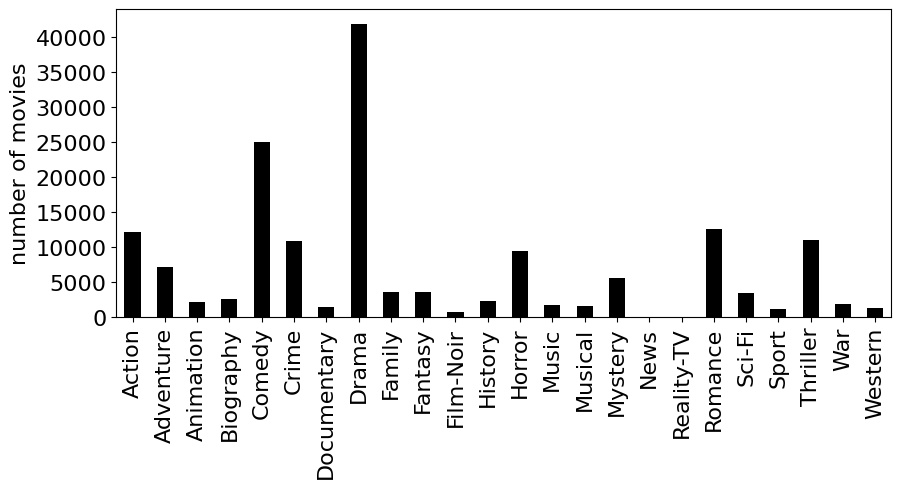</div>

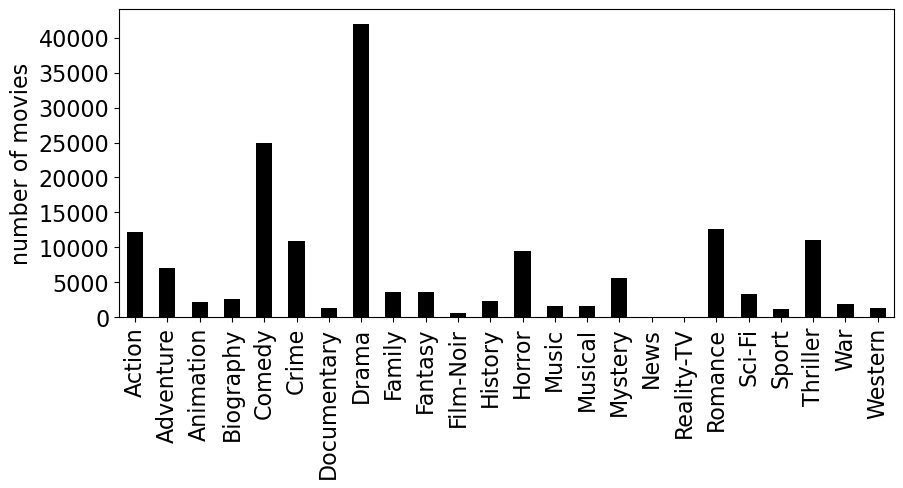

In [39]:
# plot 'genre_num' with the y-axis labelled 'number of movies'

plot_dict(genre_num, 'number of movies')

In [40]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q4 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q4 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** Can you tell what the most popular **genres** are from the plot? Do you see anything surprising in this plot?

In [41]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 5:** **Plot** the **number** of movies **directed** by *Stanley Kubrick* in each *genre* as a **bar graph**.

You **must** only include those `genres` in which *Stanley Kubrick* has directed **at least** one movie, in your plot.

You **must** first compute a **dictionary** which maps each **genre** to the **number** of movies in that **genre** directed by *Stanley Kubrick*.

**Hint:** Think about how you can use functions such as `bucketize` on a subset of movies for the category that you are interested in.

In [42]:
# first compute and store the dictionary in the variable 'kubrick_genres', then display it
# do NOT plot just yet

kubrick_movies = director_buckets['Stanley Kubrick']
kubrick_genres = {genre: len(bucketize(kubrick_movies, 'genres')[genre]) for genre in bucketize(kubrick_movies, 'genres')}
kubrick_genres

{'Crime': 3,
 'Sci-Fi': 2,
 'Drama': 9,
 'Mystery': 1,
 'Thriller': 2,
 'Adventure': 3,
 'War': 5,
 'Film-Noir': 2,
 'Comedy': 1,
 'Horror': 1,
 'Biography': 1}

Now, **plot** `kubrick_genres` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;">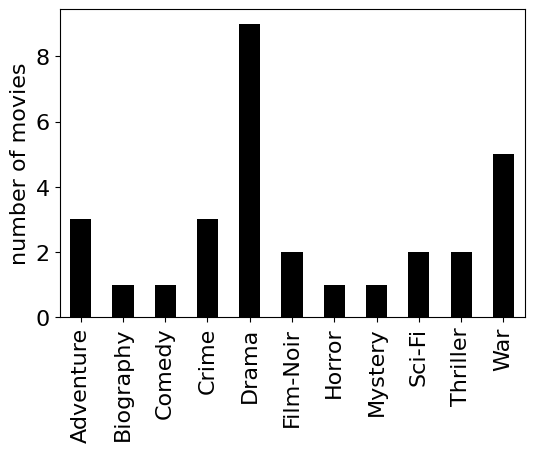</div>

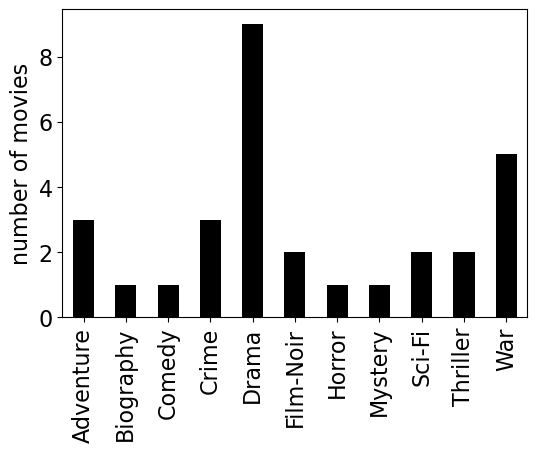

In [43]:
# now plot 'kubrick_genres' with the y-axis labelled 'number of movies'
plot_dict(kubrick_genres, 'number of movies')

In [44]:
grader.check("q5")

q5 results: All test cases passed!
q5 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q5 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q5 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** Can you similarly **plot** the **number** of films directed by your favorite director or starring your favorite cast member in each **genre**?

In [45]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 6:** **Plot** the **number** of **Sci-Fi** movies released in each *decade* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **decade** to the **number** of movies in released in that **decade**. This dictionary should look like this:

```python
{'1991 to 2000': 389,
 '1981 to 1990': 381,
 '1971 to 1980': 240,
 '2011 to 2020': 1109,
 '2001 to 2010': 529,
 '2021 to 2030': 285,
 '1951 to 1960': 198,
 '1961 to 1970': 202,
 '1911 to 1920': 6,
 '1941 to 1950': 24,
 '1931 to 1940': 29,
 '1921 to 1930': 4}
```

**Hint:** You should use `year_to_decade` function to get the decade for a movie's year

In [46]:
# first compute and store the dictionary in the variable 'sci_fi_decade_mapping', then display it
# do NOT plot just yet

# first compute and store the dictionary in the variable 'sci_fi_decade_mapping', then display it
sci_fi_movies = genre_buckets['Sci-Fi']
sci_fi_decade_mapping = {}

for movie in sci_fi_movies:
    decade = year_to_decade(movie['year'])
    if decade not in sci_fi_decade_mapping:
        sci_fi_decade_mapping[decade] = 0
    sci_fi_decade_mapping[decade] += 1

sci_fi_decade_mapping

{'1991 to 2000': 389,
 '1981 to 1990': 381,
 '1971 to 1980': 240,
 '2011 to 2020': 1109,
 '2001 to 2010': 529,
 '2021 to 2030': 285,
 '1951 to 1960': 198,
 '1961 to 1970': 202,
 '1911 to 1920': 6,
 '1941 to 1950': 24,
 '1931 to 1940': 29,
 '1921 to 1930': 4}

Now, **plot** `sci_fi_decade_mapping` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;">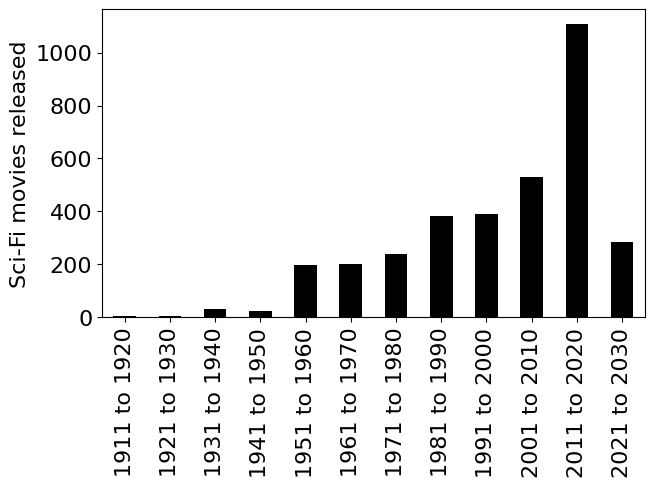</div>

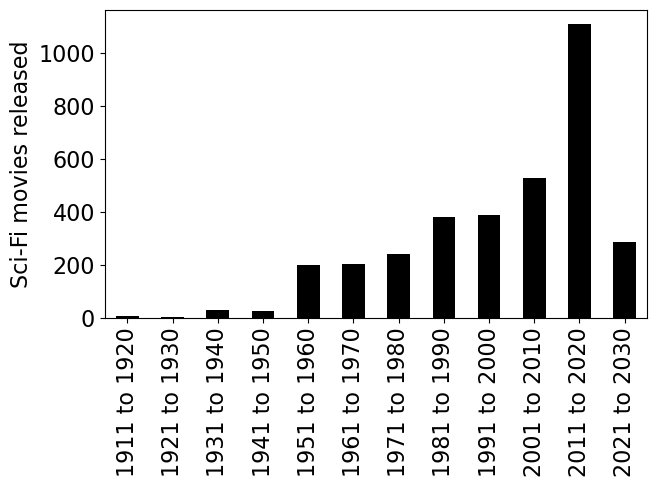

In [47]:
# now plot 'sci_fi_decade_mapping' with the y-axis labelled 'Sci-Fi movies released'
plot_dict(sci_fi_decade_mapping, 'Sci-Fi movies released')

In [48]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q6 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** Can you explain the shape of this plot? Why do you think the number of Sci-Fi movies increased so rapidly over the last decade? If you want, you could compare this plot against plots of other genres (such as `Western` or `Horror`).

In [49]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


**Question 7:** **Plot** the **median** `rating` of movies in each `genre` directed by *James Cameron* as a **bar graph**.

You **must** first compute a **dictionary** which maps each **genre** of movies directed by *James Cameron* to the **median** `rating` of all movies in that **genre**. Note that your dictionary **must not** contain any genres in which *James Cameron* has not directed any movie.

In [50]:
# first compute and store the dictionary in the variable 'cameron_median_genres', then display it
# do NOT plot just yet

# first compute and store the dictionary in the variable 'cameron_median_genres', then display it
cameron_movies = director_buckets['James Cameron']
cameron_genres = bucketize(cameron_movies, 'genres')

cameron_median_genres = {genre: median([movie['rating'] for movie in movies]) for genre, movies in cameron_genres.items()}
cameron_median_genres

{'Action': 8.0,
 'Adventure': 7.75,
 'Fantasy': 7.75,
 'Drama': 7.7,
 'Romance': 7.9,
 'Sci-Fi': 8.25,
 'Comedy': 7.3,
 'Thriller': 5.55,
 'Mystery': 7.5,
 'Horror': 3.8}

Now, **plot** `cameron_median_genres` as a **bar graph**. Your plot should look like this:

<div style="text-align: center;">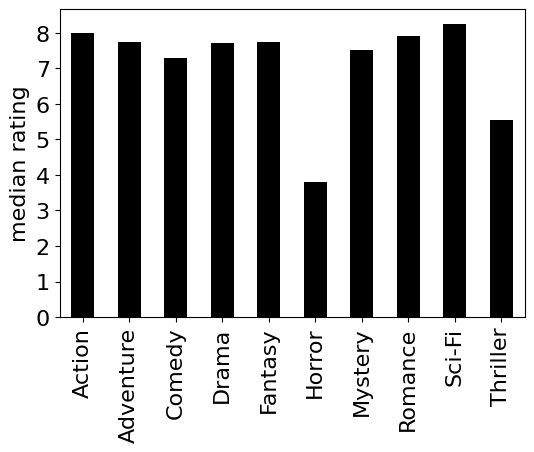</div>

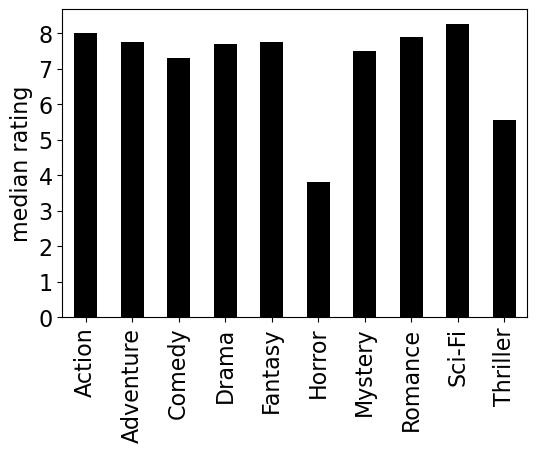

In [51]:
# now plot 'cameron_median_genres' with the y-axis labelled 'median rating'
plot_dict(cameron_median_genres, 'median rating')

In [52]:
grader.check("q7")

q7 results: All test cases passed!
q7 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q7 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is incorrect (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q7 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'plot is not properly labeled (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** *James Cameron* has directed many critically acclaimed movies such as *Aliens*, *The Terminator*, *Avatar*, and *Titanic*. Nevertheless, median ratings of his work in the *Thriller*, and especially *Horror* genres are surprisingly lackluster. Can you explain this inconsistency?

Hint: Take a look at the years of release of the films in these genres. 

In [53]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


The visualization in Question 7 immediately tells us that the **median** *Fantasy* movie directed by *James Cameron* is rated higher than the **median** *Horror* movie. However, it is a little hard to tell how the **median** *Romance* movie fares against the **median** *Adventure* movie. In order to compare the `genres`, it would be useful to **sort** the `genres` by their **median** `rating`.

Refer [Mike's](???) or [Louis'](???) lecture notes on using function references to sort a collection by value(s) related to that collection's elements.

**Question 8:** Produce a **list** of `genres` of films directed by *James Cameron* sorted in **decreasing order** of their **median** `rating`.

**Hint:** Refer to Task 4.2 in [Lab-P9](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-s24-projects/-/tree/main/lab-p9) to understand how to sort a collection using the `key` parameter.

In [54]:
# compute and store the answer in the variable 'cameron_genres_desc', then display it
cameron_genres_desc = sorted(cameron_median_genres, key=cameron_median_genres.get, reverse=True)
cameron_genres_desc

['Sci-Fi',
 'Action',
 'Romance',
 'Adventure',
 'Fantasy',
 'Drama',
 'Mystery',
 'Comedy',
 'Thriller',
 'Horror']

In [55]:
grader.check("q8")

q8 results: All test cases passed!
q8 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q8 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'recomputed variable defined in Question 7 (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Question 9:** Produce a **list** of movies directed by *Martin Scorsese* and starring *Robert De Niro* sorted in **increasing** order of their `year` of release.

Your output **must** be a **list** of **dictionaries** of movies having *Martin Scorsese* as one of the `directors`, and *Robert De Niro* as one of the `cast` members, that are **sorted** in **increasing** order of their `year`.

In [56]:
# compute and store the answer in the variable 'scorsese_de_niro_movies', then display it
# compute and store the answer in the variable 'cameron_genres_desc', then display it
# compute and store the answer in the variable 'scorsese_de_niro_movies', then display it
scorsese_movies = director_buckets['Martin Scorsese']
de_niro_movies = cast_buckets['Robert De Niro']

scorsese_de_niro_movies = [movie for movie in scorsese_movies if movie in de_niro_movies]
scorsese_de_niro_movies.sort(key=lambda movie: movie['year'])

scorsese_de_niro_movies

[{'title': 'Mean Streets',
  'year': 1973,
  'duration': 112,
  'genres': ['Crime', 'Drama', 'Thriller'],
  'rating': 7.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Harvey Keitel', 'David Proval', 'Amy Robinson']},
 {'title': 'Taxi Driver',
  'year': 1976,
  'duration': 114,
  'genres': ['Crime', 'Drama'],
  'rating': 8.2,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro',
   'Jodie Foster',
   'Cybill Shepherd',
   'Albert Brooks']},
 {'title': 'New York, New York',
  'year': 1977,
  'duration': 155,
  'genres': ['Drama', 'Music', 'Musical'],
  'rating': 6.6,
  'directors': ['Martin Scorsese'],
  'cast': ['Liza Minnelli',
   'Robert De Niro',
   'Lionel Stander',
   'Barry Primus']},
 {'title': 'Raging Bull',
  'year': 1980,
  'duration': 129,
  'genres': ['Biography', 'Drama', 'Sport'],
  'rating': 8.1,
  'directors': ['Martin Scorsese'],
  'cast': ['Robert De Niro', 'Cathy Moriarty', 'Joe Pesci', 'Frank Vincent']},
 {'title': 'The King of Comedy

In [57]:
grader.check("q9")

q9 results: All test cases passed!
q9 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-2)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q9 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'does not find only the movies directed by *Martin Scorsese* and starring *Robert De Niro* (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** Can you think of other famous director-actor combinations? Can you find a combination with more movies than *Scorsese* and *De Niro*?

In [58]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


### Finding the best `directors`

Notice that the movie with the **highest** `rating` in the dataset is

```python
{'title': 'Ardhambardha Premakathe',
 'year': 2023,
 'duration': 136,
 'genres': ['Comedy', 'Romance'],
 'rating': 9.8,
 'directors': ['Aravind Kaushik'],
 'cast': ['Abhilash M', 'Dwarish Abhilash', 'K.P. Aravind', 'Ashwathi']}
```

This movie is one of the only two movies directed by this `director`. It is hardly appropriate to use this one movie to hail this director as one of the best ever given the small sample size. Moreover, **seven out of the top ten** highest rated movies in the dataset happen to be from the `year` **2023** or **2024**, while **over half of the top hundred** highest rated movies were released after the `year` *2020*. This is explained by the fact that IMDb `ratings` tend to be **inflated** soon after release, and *settle* down after a while.

Therefore, if we want to identify who the **best** directors are, it would be a good idea to ignore the movies that were released **after** the `year` *2020*, and to restrict our attention to `directors` who have directed a **decent number** of movies. 

**Question 10:** Produce a **list** of `directors` who have directed **at least** *10* movies, have a **median** `rating` of **at least** *7.5*, and have a **minimum** `rating` of **at least** *5.0*. You **must** **exclude** all movies released **after** the `year` *2020*.

Your output **must** be a **list** of the names of the `directors`. The order does **not** matter.

**Hint**: You must first create a **list** of movies **excluding** the movies released **after** the `year` *2020*. Then, among these movies, you must find the `directors` who have directed `>= 10` movies, and whose movies have a **median** `rating` of `>= 7.5`, as well as a **minimum** `rating` of `>= 5.0`.

In [59]:
# compute and store the answer in the variable 'best_directors', then display it

# Exclude movies released after 2020
movies_before_2021 = [movie for movie in movies if movie['year'] <= 2020]

# Create a dictionary to store director information
director_info = {}

# Iterate over the movies and update director information
for movie in movies_before_2021:
    for director in movie['directors']:
        if director not in director_info:
            director_info[director] = {'movies': [], 'ratings': []}
        director_info[director]['movies'].append(movie)
        director_info[director]['ratings'].append(movie['rating'])

# Find the best directors based on the criteria
best_directors = [
    director
    for director, info in director_info.items()
    if len(info['movies']) >= 10 and median(info['ratings']) >= 7.5 and min(info['ratings']) >= 5.0
]

best_directors

['Shyam Benegal',
 'Sergiu Nicolaescu',
 'Theodoros Angelopoulos',
 'Christopher Nolan',
 'P. Padmarajan',
 'William Wyler',
 'Ingmar Bergman',
 'Quentin Tarantino',
 'Stanley Kubrick',
 'Ertem Egilmez',
 'Yoshikazu Yasuhiko',
 'Yasujirô Ozu',
 'Akira Kurosawa',
 'Jean-Pierre Melville',
 'Martin Scorsese',
 'S. Shankar',
 'Mani Ratnam',
 'S.S. Rajamouli',
 'David Fincher',
 'Michael Cacoyannis',
 'Gulzar',
 'Rituparno Ghosh',
 'Masaki Kobayashi',
 'Singeetam Srinivasa Rao',
 'Tim Van Someren',
 'Goran Markovic',
 'Satyajit Ray',
 'Preston Sturges',
 'Sibi Malayil',
 'Nikita Mikhalkov',
 'K. Balachander',
 'Hayao Miyazaki',
 'Oldrich Lipský',
 'Georgiy Daneliya',
 'Krzysztof Kieslowski',
 'Bahram Beyzaie']

In [60]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'movies released after the `year` *2020* are not excluded (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect comparison operators are used to check if the **number** of movies, **median**, and **minimum** `rating` are as expected (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
q10 - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'incorrect logic is used to answer (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

**Food for thought:** How many of these directors can you recognize? Do you spot your favorite director in that list? Can you come up with better criteria for deciding who the best directors are?

In [61]:
# Food for thought is an entirely OPTIONAL exercise
# you may leave your thoughts here as a comment if you wish to


In [62]:
grader.check("general_deductions")

general_deductions results: All test cases passed!
general_deductions - 1 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Outputs not visible/did not save the notebook file prior to running the cell containing "export". We cannot see your output if you do not save before generating the zip file. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 2 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Used concepts/modules such as `csv.DictReader` and `pandas` not covered in class yet. Note that built-in functions that you have been introduced to can be used. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 3 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Large outputs such as `movies` are displayed in the notebook. (-3)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.
general_deductions - 4 message: Note that the Gradescope autograder will deduct points if your code fails the following rubric point - 'Import statements are not mentioned in the required cell at the top of the notebook. (-1)'.The public tests cannot determine if your code satisfies these requirements. Verify your code manually.

In [63]:
grader.check("summary")

summary results: All test cases passed!
summary - 1 message: Please submit your zip folder to Gradescope, and check your final score there. The Gradescope autograder will make deductions to your score based on the rubric.

## Submission
It is recommended that at this stage, you Restart and Run all Cells in your notebook.
That will automatically save your work and generate a zip file for you to submit.

**SUBMISSION INSTRUCTIONS**:
1. **Upload** the zipfile to Gradescope.
2. If you completed the project with a **partner**, make sure to **add their name** by clicking "Add Group Member"
in Gradescope when uploading the zip file.
3. Check **Gradescope** results as soon as the auto-grader execution gets completed.
4. Your **final score** for this project is the score that you see on **Gradescope**.
5. You are **allowed** to resubmit on Gradescope as many times as you want to.
6. **Contact** a TA/PM if you lose any points on Gradescope for any **unclear reasons**.

In [64]:
# running this cell will create a new save checkpoint for your notebook
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))

<IPython.core.display.Javascript object>

In [65]:
!jupytext --to py p9.ipynb

[jupytext] Reading p9.ipynb in format ipynb
[jupytext] Writing p9.py


In [66]:
grader.export(pdf=False, run_tests=False, files=["p9.py"])